# Przeuczenie i niedouczenie modeli w uczeniu maszynowym


W uczeniu maszynowym, jednym z kluczowych wyzwań jest znalezienie odpowiedniego balansu między złożonością modelu a jego zdolnością do generalizacji. Dwa główne problemy, które mogą wystąpić w tym kontekście, to **przeuczenie (overfitting)** i **niedouczenie (underfitting)**.

## Przeuczenie (Overfitting)

### Definicja
Przeuczenie występuje, gdy model uczy się zbyt dokładnie na danych treningowych, włączając w to szum i przypadkowe fluktuacje, które nie odzwierciedlają ogólnych wzorców w danych.

### Charakterystyka
- Bardzo dobra wydajność na danych treningowych
- Słaba wydajność na danych testowych lub nowych, niewidzianych danych
- Model jest zbyt skomplikowany w stosunku do rzeczywistej złożoności problemu

### Przyczyny
- Zbyt długi czas treningu
- Zbyt złożony model (np. zbyt wiele warstw w sieci neuronowej)
- Niewystarczająca ilość danych treningowych

### Metody zapobiegania
1. Regularyzacja (L1, L2)
2. Dropout (w sieciach neuronowych)
3. Early stopping
4. Walidacja krzyżowa
5. Zwiększenie zbioru danych treningowych

## Niedouczenie (Underfitting)

### Definicja
Niedouczenie występuje, gdy model jest zbyt prosty, aby uchwycić istotne wzorce w danych, co prowadzi do słabej wydajności zarówno na danych treningowych, jak i testowych.

### Charakterystyka
- Słaba wydajność na danych treningowych
- Słaba wydajność na danych testowych
- Model jest zbyt prosty, aby uchwycić złożoność problemu

### Przyczyny
- Zbyt prosty model
- Niewystarczający czas treningu
- Nieodpowiednie cechy wejściowe

### Metody zapobiegania
1. Zwiększenie złożoności modelu
2. Wydłużenie czasu treningu
3. Feature engineering - tworzenie bardziej odpowiednich cech wejściowych
4. Zmniejszenie regularyzacji (jeśli jest stosowana)

## Równowaga między przeuczeniem a niedouczeniem

Celem jest znalezienie "złotego środka", gdzie model jest wystarczająco złożony, aby uchwycić istotne wzorce w danych, ale nie na tyle skomplikowany, aby uczyć się szumu. Można to osiągnąć poprzez:

1. Iteracyjne dostosowywanie hiperparametrów modelu
2. Stosowanie technik walidacji, takich jak walidacja krzyżowa
3. Monitorowanie wydajności modelu na zbiorze walidacyjnym podczas treningu
4. Wykorzystanie technik automatycznego doboru modelu, takich jak grid search czy random search

## Przykłady

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
import plotly.express as px

np.random.seed(42)
sns.set(font_scale=1.3)

Bad value in file PosixPath('/Users/tomasz/.matplotlib/stylelib/company.mplstyle'), line 3 ("axes.prop_cycle: cycler('color', ['#123D98', '#C21E3C', '#E2A713', '#00AEEF', '#7F3F98'])"): Key axes.prop_cycle: "cycler('color', ['" is not a valid cycler construction: unterminated string literal (detected at line 1) (<unknown>, line 1)
Bad value in file PosixPath('/Users/tomasz/.matplotlib/stylelib/company.mplstyle'), line 6 ('grid.color: #e0e0e0'): Key grid.color: '' does not look like a color arg


In [2]:
# n_samples=700
raw_data = make_moons(n_samples=2000, noise=0.25, random_state=42)
data = raw_data[0]
target = raw_data[1]

print(f'{data[:5]}\n')
print(f'{target[:5]}')

[[ 1.58230488  0.36687604]
 [ 0.32765354  0.98236569]
 [ 0.48826986 -0.2467652 ]
 [-0.93742051 -0.02942909]
 [ 0.63439695 -0.41222371]]

[1 0 1 0 1]


### Wygenerowanie danych

In [3]:
df = pd.DataFrame(data=np.c_[data, target], columns=['x1', 'x2', 'target'])
df.head()

,x1,x2,target
0,1.582305,0.366876,1.0
1,0.327654,0.982366,0.0
2,0.488270,-0.246765,1.0
3,-0.937421,-0.029429,0.0
4,0.634397,-0.412224,1.0


### Wizualizacja danych

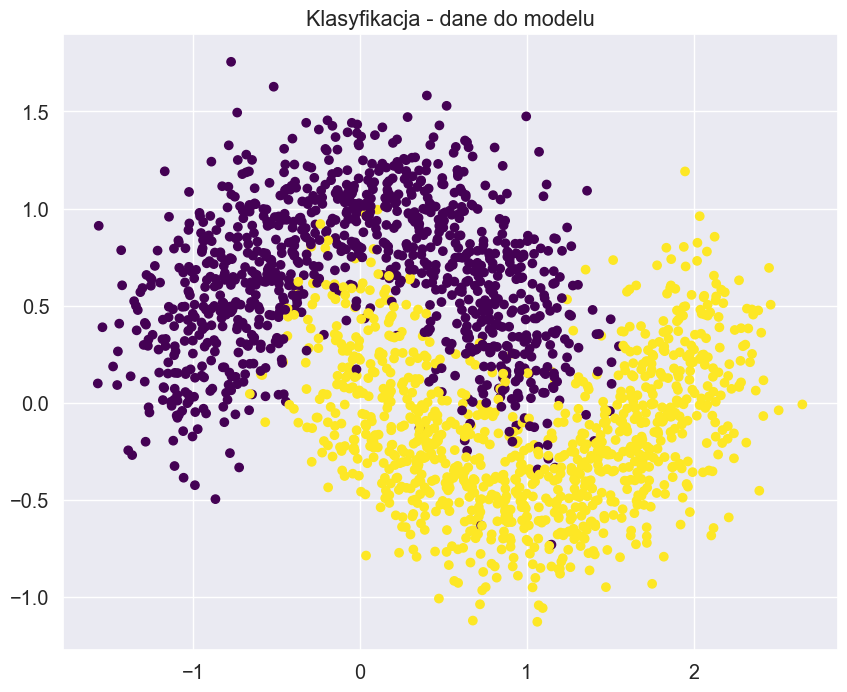

In [4]:
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], c=target, cmap='viridis')
plt.title('Klasyfikacja - dane do modelu')
plt.show()

### Podział na zbiór treningowy i testowy

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1400, 2)
X_test shape: (600, 2)
y_train shape: (1400,)
y_test shape: (600,)


### Niedouczenie - Regresja Logistyczna

In [9]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

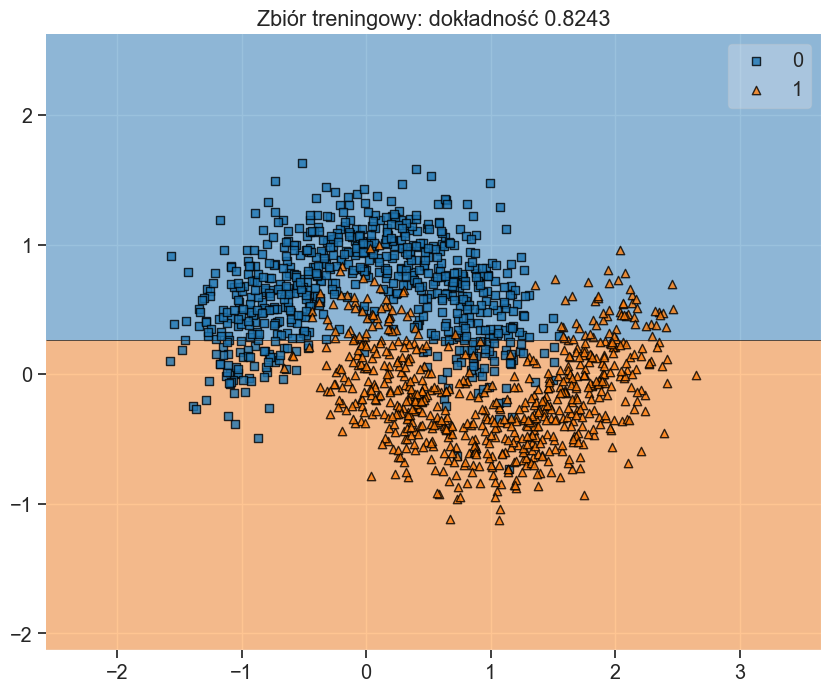

In [8]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, classifier)
plt.title(f'Zbiór treningowy: dokładność {classifier.score(X_train, y_train):.4f}')
plt.show()

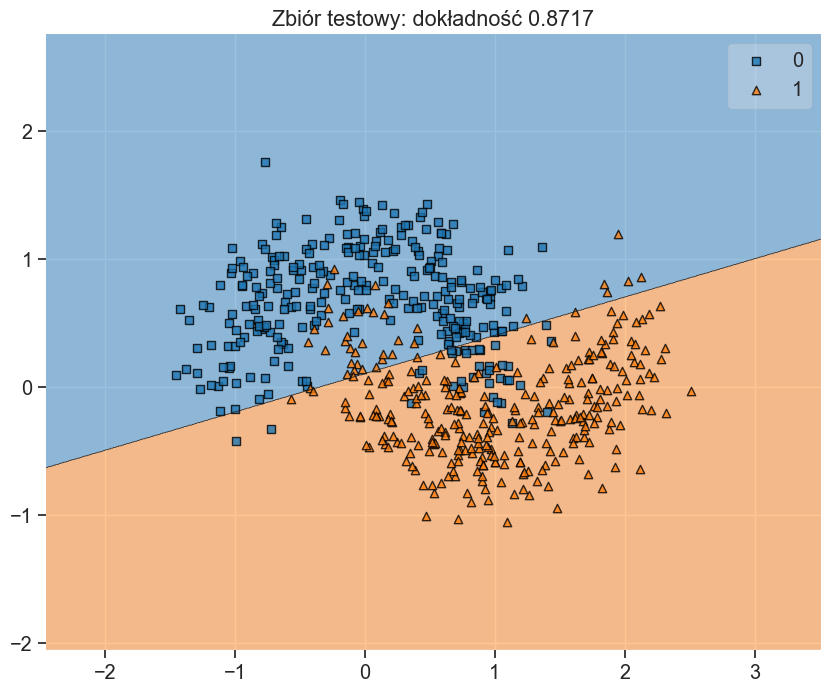

In [10]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, classifier)
plt.title(f'Zbiór testowy: dokładność {classifier.score(X_test, y_test):.4f}')
plt.show()

### Niedouczenie - Drzewa Decyzyjne

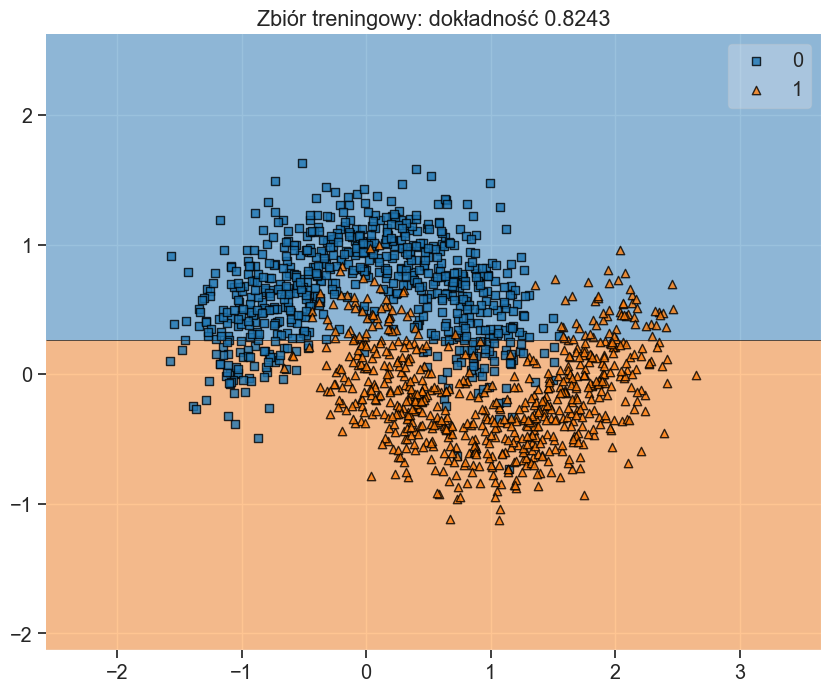

In [11]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=1)
classifier.fit(X_train, y_train)

plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, classifier)
plt.title(f'Zbiór treningowy: dokładność {classifier.score(X_train, y_train):.4f}')
plt.show()

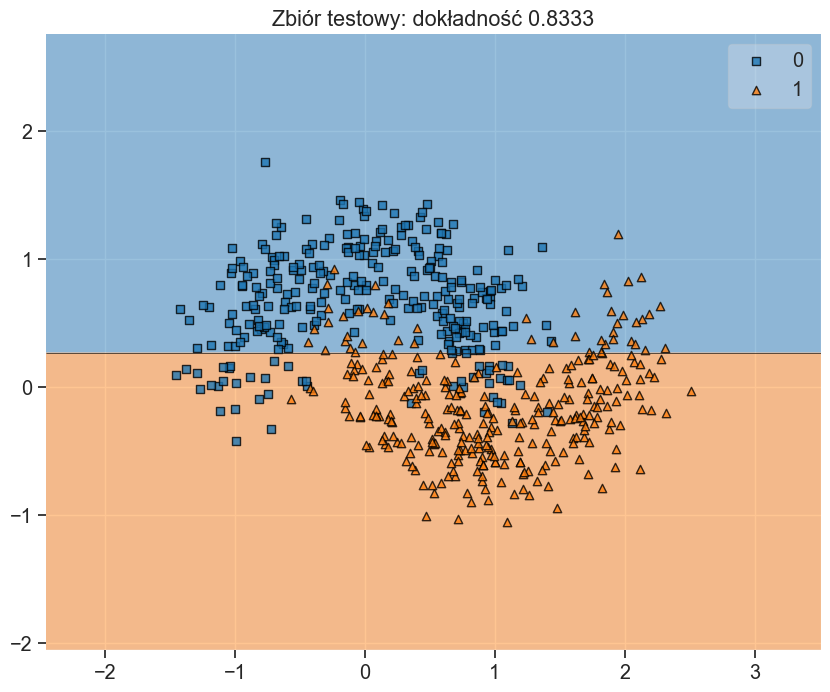

In [12]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, classifier)
plt.title(f'Zbiór testowy: dokładność {classifier.score(X_test, y_test):.4f}')
plt.show()

### Przykład przeuczenia

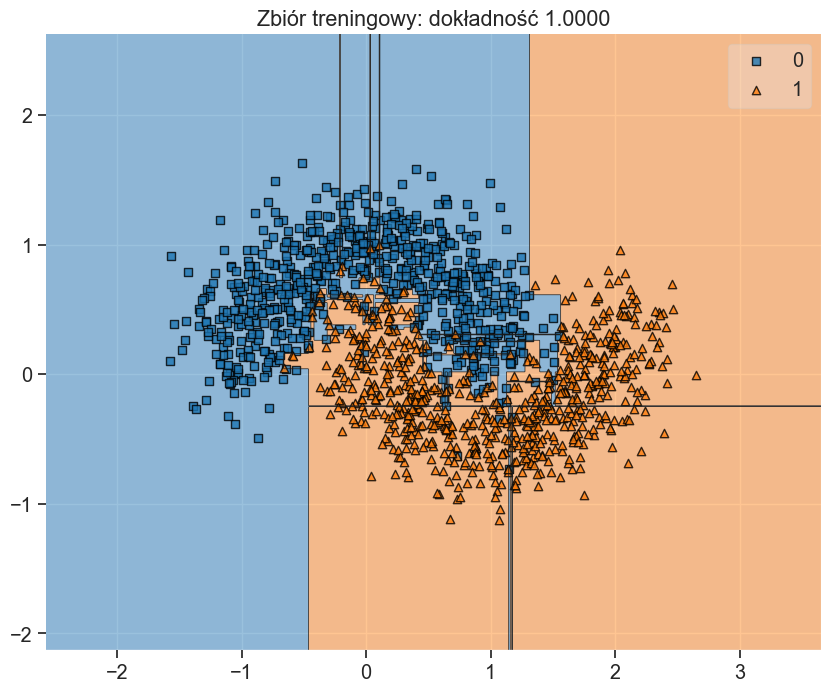

In [13]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, classifier)
plt.title(f'Zbiór treningowy: dokładność {classifier.score(X_train, y_train):.4f}')
plt.show()

In [15]:
# przykład 2: rzeczywista głębokość wytrenowanego drzewa (liczba całkowita)
print(classifier.tree_.max_depth)

14


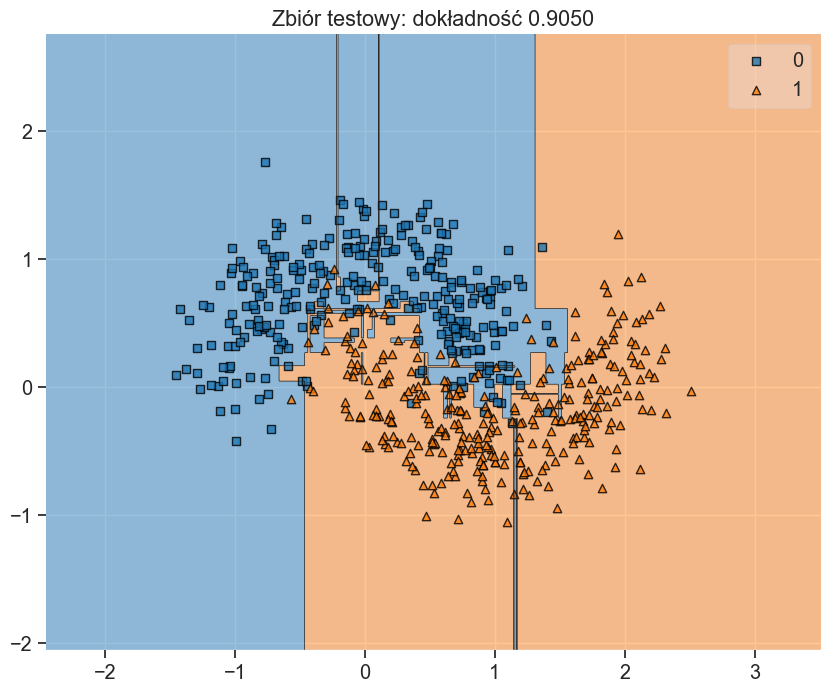

In [16]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, classifier)
plt.title(f'Zbiór testowy: dokładność {classifier.score(X_test, y_test):.4f}')
plt.show()

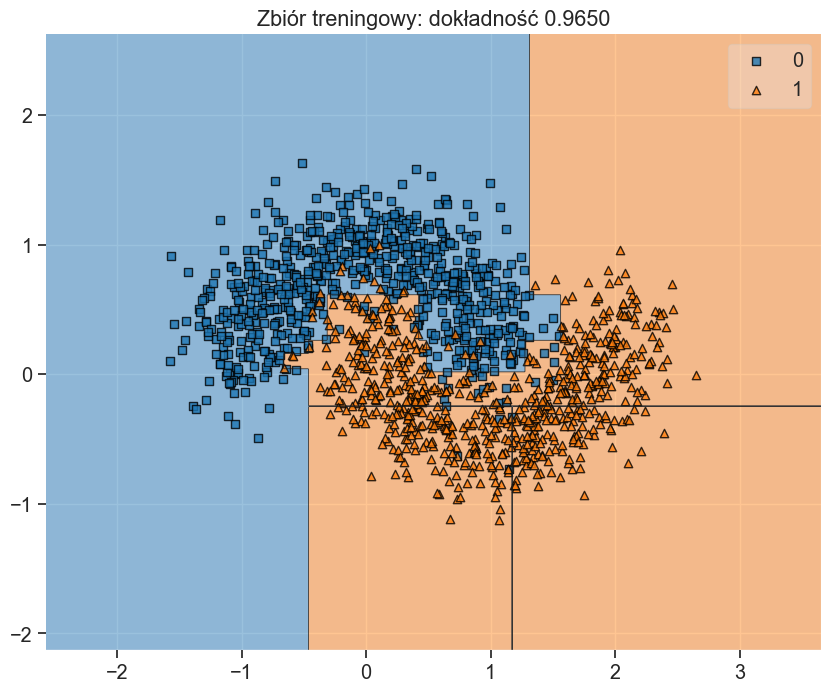

In [ ]:
classifier = DecisionTreeClassifier(max_depth=6)
classifier.fit(X_train, y_train)

plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, classifier)
plt.title(f'Zbiór treningowy: dokładność {classifier.score(X_train, y_train):.4f}')
plt.show()

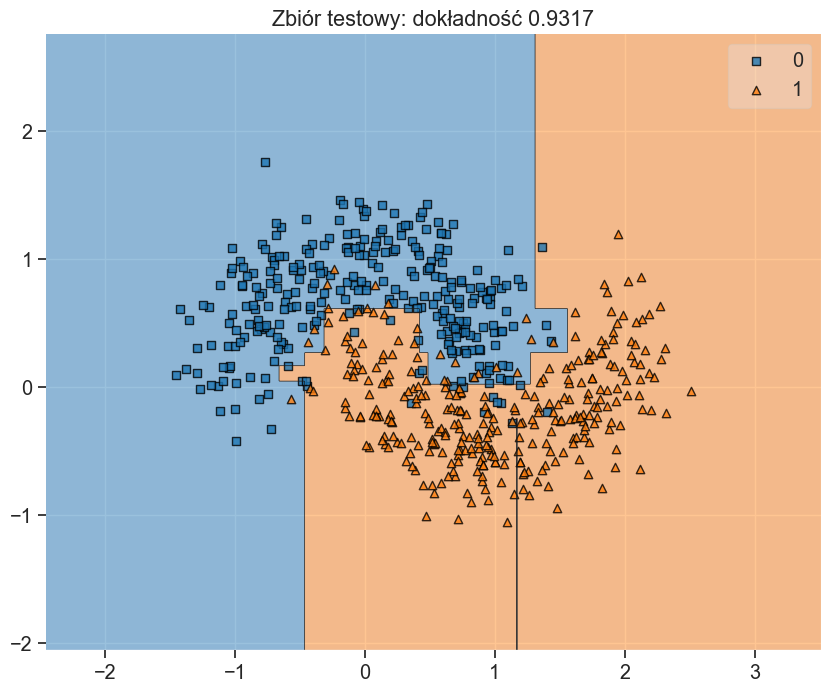

In [18]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, classifier)
plt.title(f'Zbiór testowy: dokładność {classifier.score(X_test, y_test):.4f}')
plt.show()